In [1]:
from pydub import AudioSegment
from IPython import display
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import numpy as np
from pydub import silence, effects, exceptions
import array

In [2]:
def listtofile(lijst, bestandsnaam):
    with open(bestandsnaam, 'w') as f:
        first = True
        for ding in lijst:
            if not first:
                f.write("\n")
            else:
                first = False
            f.write(f"{ding}")

In [3]:

audios = []
for file in os.listdir("data/downloaded"):
    if file.endswith(".wav"):
        audios.append(file[:-4])

listtofile(audios,"data/audios")

In [6]:

def stereodiff(sound):
    sound_channels = sound.split_to_mono()
    c1 = sound_channels[0]
    c2 = sound_channels[1]
    a1 = c1.get_array_of_samples()
    a2 = c2.get_array_of_samples()
    rate = c1.frame_rate
    diff = np.array(a1) - np.array(a2)
    return diff

def stereodifferent(sound):
    diff = stereodiff(sound)
    return bool(np.any(diff))

def stereoreallydifferent(sound, threshold=-60.0):
    # Dit is misschien niet de beste manier. Mischien met spectogram dat
    # een betere manier te vinden is om te kijken of ze praktisch hetzelfde zijn
    # Overigens: is ook afhankelijk wat we er uiteindlijk mee gaan doen,
    # als we óók van de échte stereo maar één kanaal gaan gebruiken maakt het 
    # toch allemaal niet uit
    diff = stereodiff(sound)
    chan = sound.split_to_mono()[0]
    diffaudio = chan._spawn(array.array(chan.array_type, diff))
    return diffaudio.dBFS >= threshold


In [8]:
monos = []
nepstereos = []
bijnanepstereos = []
stereos = []

for ding in tqdm(audios):
    try:
        sound = AudioSegment.from_file("data/downloaded/" + ding + ".wav")
        if sound.channels == 1:
            # is mono
            monos.append(ding)
        
        else:
            if not stereodifferent(sound):
                # nep stereo, beide channels zijn precies hetzelfde
                nepstereos.append(ding)
            
            elif stereoreallydifferent(sound):
                # stereo really different
                stereos.append(ding)

            else:
                # stereos zijn op ruis na precies hetzelfde
                bijnanepstereos.append(ding)

    except exceptions.CouldntDecodeError:
        #print("Couldn't decode: " + ding)
        continue
        
        
listtofile(monos,"data/monos")
listtofile(nepstereos,"data/nepstereos")
listtofile(bijnanepstereos,"data/bijnanepstereos")
listtofile(stereos,"data/stereos")
print(f"er zijn {len(monos)} monos")
print(f"er zijn {len(nepstereos)} nepstereos")
print(f"er zijn {len(bijnanepstereos)} bijnanepstereos")
print(f"er zijn {len(stereos)} stereos")

100%|██████████| 2280/2280 [09:54<00:00,  3.84it/s]

er zijn 449 monos
er zijn 62 nepstereos
er zijn 220 bijnanepstereos
er zijn 1548 stereos


In [19]:
import matplotlib.pyplot as plt
import numpy as np
from pydub import silence, effects
from IPython.display import display
import array

stereo = stereos[0]
sound = AudioSegment.from_file("data/downloaded/" + stereo + ".wav")
print(stereodifferent(sound))
mono = [ding for ding in audios if ding not in stereos][0]
sound = AudioSegment.from_file("data/downloaded/" + mono + ".wav")
print(stereodifferent(sound))

i = -1

True
True


1548
29105
29.105238095238096


max_dBFS: -2.4635034677555243
diff dBFS: -38.59978410902434
diff dBFS: -38.59978410902434


(129, 10026)
(129,)


array([    0.      ,   172.265625,   344.53125 ,   516.796875,
         689.0625  ,   861.328125,  1033.59375 ,  1205.859375,
        1378.125   ,  1550.390625,  1722.65625 ,  1894.921875,
        2067.1875  ,  2239.453125,  2411.71875 ,  2583.984375,
        2756.25    ,  2928.515625,  3100.78125 ,  3273.046875,
        3445.3125  ,  3617.578125,  3789.84375 ,  3962.109375,
        4134.375   ,  4306.640625,  4478.90625 ,  4651.171875,
        4823.4375  ,  4995.703125,  5167.96875 ,  5340.234375,
        5512.5     ,  5684.765625,  5857.03125 ,  6029.296875,
        6201.5625  ,  6373.828125,  6546.09375 ,  6718.359375,
        6890.625   ,  7062.890625,  7235.15625 ,  7407.421875,
        7579.6875  ,  7751.953125,  7924.21875 ,  8096.484375,
        8268.75    ,  8441.015625,  8613.28125 ,  8785.546875,
        8957.8125  ,  9130.078125,  9302.34375 ,  9474.609375,
        9646.875   ,  9819.140625,  9991.40625 , 10163.671875,
       10335.9375  , 10508.203125, 10680.46875 , 10852.

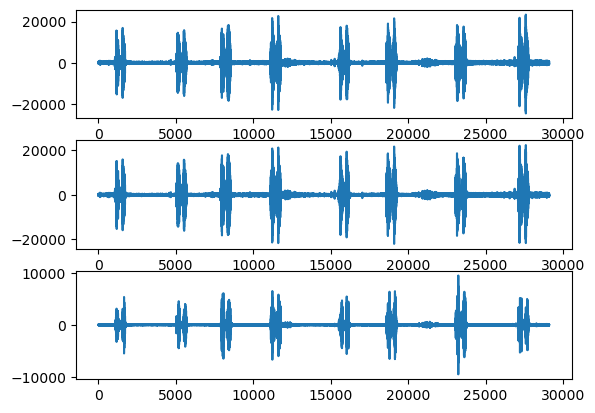

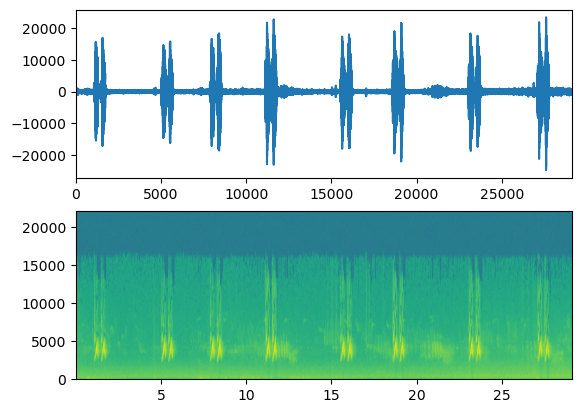

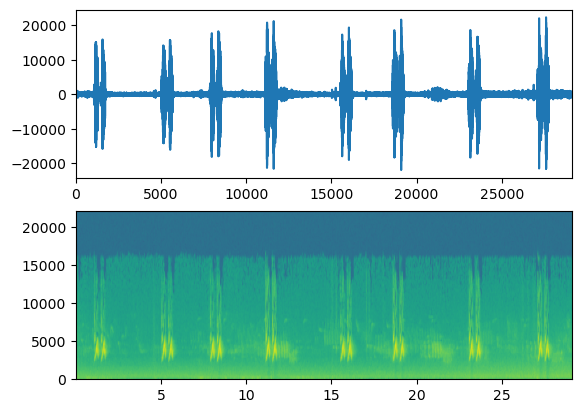

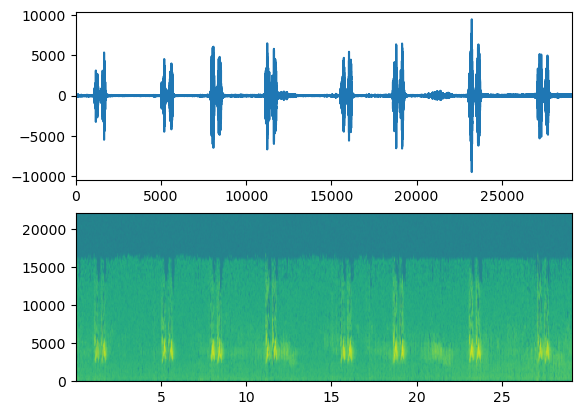

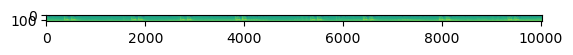

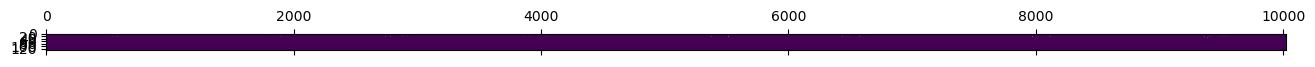

In [51]:
i += 1
stereo = stereos[i]
stereo = stereos[i]
print(len(stereos))

sound = AudioSegment.from_file("data/downloaded/" + stereo + ".wav")
sound_channels = sound.split_to_mono()

print(len(sound))
print(sound.duration_seconds)

c1 = sound_channels[0]
c2 = sound_channels[1]
a1 = c1.get_array_of_samples()
a2 = c2.get_array_of_samples()
rate = c1.frame_rate
time = np.linspace(0, len(a1) / rate * 1000, num=len(a1))
diff = np.array(a1) - np.array(a2)
#diff = np.array(a1) + np.array(a2)

plt.figure()
plt.subplot(311).plot(time, a1)
#plt.subplot(312).set_xlim(0, len(a1) / rate * 1000)
plt.subplot(312).plot(time, a2)
plt.subplot(313).plot(time, diff)
plt.plot()
diff
a1 == a2
display(sound)
display(c1)
display(c2)

plt.figure()
plt.subplot(211).plot(time, a1)
plt.subplot(211).set_xlim(0, len(a1) / rate * 1000)
s1 = plt.subplot(212).specgram(a1, Fs=rate)
plt.plot()

plt.figure()
plt.subplot(211).plot(time, a2)
plt.subplot(211).set_xlim(0, len(a2) / rate * 1000)
s2 = plt.subplot(212).specgram(a2, Fs=rate)
plt.plot()

plt.figure()
plt.subplot(211).plot(time, diff)
plt.subplot(211).set_xlim(0, len(diff) / rate * 1000)
plt.subplot(212).specgram(diff, Fs=rate)
plt.plot()

diffaudio = c1._spawn(array.array(c1.array_type, diff))
print(f"max_dBFS: {sound.max_dBFS}")
print(f"diff dBFS: {diffaudio.dBFS}")
print(f"diff dBFS: {diffaudio.dBFS}")
#print(diffaudio.rms)
display(diffaudio)

plt.figure()
(sp1,freqs,t,_) = s1
(sp2,_,_,_) = s2
print(sp1.shape)
#plt.imshow(sp1-sp2)
pad_xextent = (128) / rate / 2
xextent = np.min(t) - pad_xextent, np.max(t) + pad_xextent
xextent = np.min(t), np.max(t)
xmin, xmax = xextent
freqs += rate
extent = xmin, xmax, freqs[0], freqs[-1]
plt.imshow(np.flipud(10. * np.log10(sp1)) )#, extent=extent)
plt.matshow(sp1)
print(freqs.shape)
freqs - rate

In [10]:
import array
sound_channels = sound.split_to_mono()
print(np.array_equal(np.array(sound_channels[0].get_array_of_samples()),
                     np.array(sound_channels[1].get_array_of_samples())))

print(np.nonzero(np.array(sound_channels[0].get_array_of_samples()) - 
                     np.array(sound_channels[1].get_array_of_samples())))

print("***")
print(sound.channels)
print(sound_channels[0].channels)
print(sound_channels[1].channels)
print(len(sound_channels[0]))
print(len(sound_channels[1]))
c1 = sound_channels[0].get_array_of_samples()
print(len(c1))
a1 = np.array(c1)
print("***")
print(len(a1))
a1 *= -1
print(len(a1))
c1 = array.array((sound_channels[0]).array_type, a1)
print("***")
print(len(c1))

print(sound_channels[0].get_array_of_samples() == sound_channels[1].get_array_of_samples())

sound_channels[0] = (sound_channels[0])._spawn(c1)
print(sound_channels[0].channels)
print(len(sound_channels[0]))
print(len(sound_channels[1]))

sound2 = AudioSegment.from_mono_audiosegments(sound_channels[0], sound_channels[1])
stereodifferent(sound)
stereodifferent(sound2)

False
(array([    882,     911,     921, ..., 1716253, 1716262, 1716265],
      shape=(1546295,)),)
***
2
1
1
35784
35784
1717632
***
1717632
1717632
***
1717632
False
1
35784
35784


True

In [11]:
from pydub import silence, effects

print(len(sound))
print(sound.max_dBFS)
sound2 = effects.normalize(sound)
print(sound2.max_dBFS)
print(silence.detect_silence(sound, silence_thresh=-40))
print(silence.detect_nonsilent(sound, silence_thresh=-33))

35784
-0.3163565961204988
-0.09997527890305569
[[0, 2110], [4153, 5264], [5722, 7107], [8207, 9610], [10069, 11314], [11706, 13210], [15636, 16842], [18785, 19833], [21693, 22864], [23278, 24973], [25295, 26995], [29246, 30433], [30822, 32207], [32542, 34577]]
[[2149, 2480], [3696, 4015], [5274, 5586], [7747, 8058], [9616, 9936], [11318, 11634], [13213, 13539], [15192, 15516], [16845, 18476], [20051, 21657], [22869, 23180], [24982, 25248], [27001, 27328], [28858, 29177], [30440, 30748], [32215, 32510], [34594, 35784]]


2148 2483
3695 4016
5273 5586
7747 8059
9615 9937
11318 11635
13213 13540
15192 15516
16845 18477
20051 21658
22869 23180
24982 25256
27000 27329
28856 29178
30440 30749
32214 32511
34592 35784


d:\miniconda3\envs\vogelgeluiden\Lib\site-packages\matplotlib\axes\_axes.py:8264: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


[]

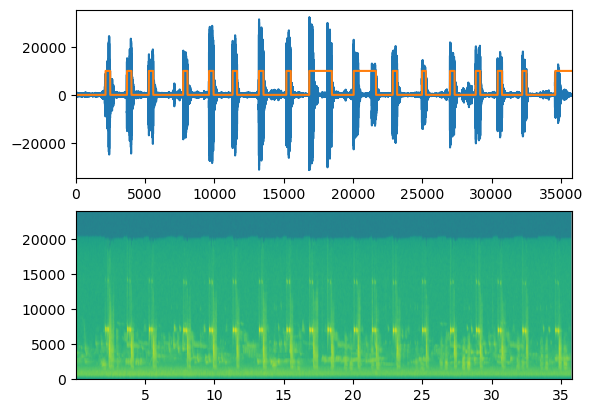

In [12]:
import matplotlib.pyplot as plt
import numpy as np
c1 = sound_channels[0]
c1 = effects.normalize(c1)
a1 = c1.get_array_of_samples()
rate = c1.frame_rate
time = np.linspace(0, len(a1) / rate * 1000, num=len(a1))

geluiden = silence.detect_nonsilent(c1, silence_thresh=-33, seek_step=1)
tijdgeluid = np.zeros(len(a1))
for [l,r] in geluiden:
    print(l,r)
    l = int(l * rate / 1000.0)
    r = int(r * rate / 1000.0)
    tijdgeluid[l:r] = 10000

plt.subplot(211).plot(time, a1, time, tijdgeluid)
plt.subplot(211).set_xlim(0, len(a1) / rate * 1000)
plt.subplot(212).specgram(a1, Fs=rate)
plt.plot()

In [13]:
from pydub import playback

from IPython.display import display

display(c1)

ds = silence.split_on_silence(c1, silence_thresh=-33, keep_silence=200)
for d in ds:
    display(d)


In [14]:
type(sound.raw_data)
sound.array_type

'h'